In [ ]:
from google.colab import files
uploaded = files.upload()
!unzip dataset.zip

Saving dataset.zip to dataset.zip
Archive:  dataset.zip
   creating: test/
   creating: test/galib/
  inflating: test/galib/galib_1.jpg  
  inflating: test/galib/galib_105.jpg  
  inflating: test/galib/galib_107.jpg  
  inflating: test/galib/galib_109.jpg  
  inflating: test/galib/galib_113.jpg  
  inflating: test/galib/galib_114.jpg  
  inflating: test/galib/galib_116.jpg  
  inflating: test/galib/galib_120.jpg  
  inflating: test/galib/galib_122.jpg  
  inflating: test/galib/galib_123.jpg  
  inflating: test/galib/galib_129.jpg  
  inflating: test/galib/galib_13.jpg  
  inflating: test/galib/galib_15.jpg  
  inflating: test/galib/galib_150.jpg  
  inflating: test/galib/galib_152.jpg  
  inflating: test/galib/galib_153.jpg  
  inflating: test/galib/galib_162.jpg  
  inflating: test/galib/galib_163.jpg  
  inflating: test/galib/galib_179.jpg  
  inflating: test/galib/galib_188.jpg  
  inflating: test/galib/galib_190.jpg  
  inflating: test/galib/galib_191.jpg  
  inflating: test/galib/

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import os

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


In [ ]:
IMG_SIZE = 128
BATCH_SIZE = 16

train_ds = keras.preprocessing.image_dataset_from_directory(
    "train",
    labels="inferred",
    label_mode="int",
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE, IMG_SIZE),
    shuffle=True
)

test_ds = keras.preprocessing.image_dataset_from_directory(
    "test",
    labels="inferred",
    label_mode="int",
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE, IMG_SIZE),
    shuffle=True
)

class_names = train_ds.class_names
print("Classes:", class_names)
num_classes = len(class_names)


Found 425 files belonging to 4 classes.
Found 108 files belonging to 4 classes.
Classes: ['galib', 'monami', 'tahsin', 'tonmoy']


In [ ]:
normalization_layer = layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds  = test_ds.map(lambda x, y: (normalization_layer(x), y))

In [ ]:
model = keras.Sequential([
    keras.Input(shape=(128,128,1)),

    layers.Conv2D(16, (5,5), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(num_classes, activation='softmax')
])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 124, 124, 16)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 60, 60, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       401,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 416,036 (1.59 MB)

 Trainable params: 416,036 (1.59 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
EPOCHS = 15

history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=EPOCHS
)

Epoch 1/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 134ms/step - accuracy: 0.4094 - loss: 1.2894 - val_accuracy: 0.6759 - val_loss: 1.0245
Epoch 2/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6865 - loss: 0.8318 - val_accuracy: 0.7315 - val_loss: 0.5896
Epoch 3/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7909 - loss: 0.4938 - val_accuracy: 0.8333 - val_loss: 0.4203
Epoch 4/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9013 - loss: 0.3041 - val_accuracy: 0.8796 - val_loss: 0.3703
Epoch 5/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8625 - loss: 0.3291 - val_accuracy: 0.8796 - val_loss: 0.2828
Epoch 6/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9285 - loss: 0.1866 - val_accuracy: 0.9352 - val_loss: 0.2343
Epoch 7/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9573 - loss: 0.1336 - val_accuracy: 0.9259 - val_loss: 0.2093
Epoch 8/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9796 - loss: 0.0896 - val_accuracy: 0.9167 - val_lo

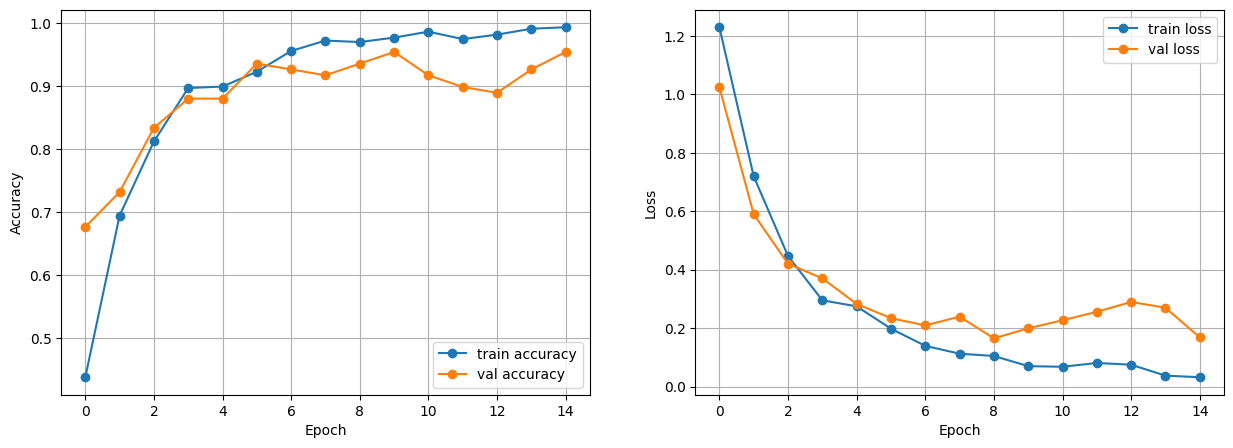

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], 'o-', label='train accuracy')
plt.plot(history.history['val_accuracy'], 'o-', label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], 'o-', label='train loss')
plt.plot(history.history['val_loss'], 'o-', label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()


In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9705 - loss: 0.1184 
Test Accuracy: 0.9537037014961243
Test Loss: 0.16833661496639252


In [ ]:
model.save("attendance_system_model.h5")
print("CNN model saved as attendance_system_model.h5")

import json
with open("labels.json", "w") as f:
    json.dump(class_names, f)

print("Model and labels saved!")

from google.colab import files
files.download("attendance_system_model.h5")
files.download("labels.json")

CNN model saved as attendance_system_model.h5
Model and labels saved!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>